# Session_06

The goal of this activity is to replicate our Excel calculations of $R^2$ in Python. We will compute the averages, determine the slope ($\beta_2$) and intercept ($\beta_1$), and calculate the total sum of squares (SST) and sum of squared errors (SSE) to derive the $R^2$ value.

## Working with Basic Mathematical Constants

In [21]:
pi

NameError: name 'pi' is not defined

In [23]:
pi = 3.14
print(pi)

3.14


In [25]:
e

NameError: name 'e' is not defined

In [27]:
e = 2.718
print(e)

2.718


In [29]:
import math

In [31]:
math.pi

3.141592653589793

In [33]:
math.e

2.718281828459045

In [35]:
pi = math.pi
e = math.e

In [37]:
print(pi)
print(e)

3.141592653589793
2.718281828459045


## Calculating

Installing pandas or openpyxl library

In [41]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


### Reading the excel file

In [48]:
import pandas

In [50]:
pandas.read_excel("C:/Users/Mahdi/OneDrive/Desktop/Econometrics/Econometrics II/Econometrics_II_Session_06.xlsx", sheet_name = "Sheet1")

,Unnamed: 0,X,Y
0,NaN,10,23
1,NaN,20,41
2,NaN,32,64
3,NaN,48,90
4,NaN,60,112


In [52]:
pandas.read_excel("C:/Users/Mahdi/OneDrive/Desktop/Econometrics/Econometrics II/Econometrics_II_Session_06.xlsx", sheet_name = "Sheet1").head(3)

,Unnamed: 0,X,Y
0,NaN,10,23
1,NaN,20,41
2,NaN,32,64


In [54]:
pandas.read_excel("C:/Users/Mahdi/OneDrive/Desktop/Econometrics/Econometrics II/Econometrics_II_Session_06.xlsx", sheet_name = "Sheet1").tail(3)

,Unnamed: 0,X,Y
2,NaN,32,64
3,NaN,48,90
4,NaN,60,112


In [56]:
import pandas as pd

In [58]:
data = pd.read_excel("C:/Users/Mahdi/OneDrive/Desktop/Econometrics/Econometrics II/Econometrics_II_Session_06.xlsx", sheet_name = "Sheet1")
data.head(3)

,Unnamed: 0,X,Y
0,NaN,10,23
1,NaN,20,41
2,NaN,32,64


In [60]:
data_cleaning_1 = data.dropna(axis=1, how='all')  #Delete NaN columns(axis=1 : columns, axis=0 : rows)
data_cleaning_1

,X,Y
0,10,23
1,20,41
2,32,64
3,48,90
4,60,112


In [62]:
data_cleaning_1['X']

0    10
1    20
2    32
3    48
4    60
Name: X, dtype: int64

In [64]:
data_cleaning_1['Y']

0     23
1     41
2     64
3     90
4    112
Name: Y, dtype: int64

In [66]:
Y = data_cleaning_1['Y']
X = data_cleaning_1['X']

### Calculating $R^2$

#### Covariance and Variance

- Variance measures how far a set of numbers is spread out from their average value. It quantifies the degree of variation in a dataset.

- Covariance indicates the direction of the linear relationship between two variables. A positive covariance means that as one variable increases, the other tends to increase, while a negative covariance indicates that as one variable increases, the other tends to decrease.

##### Calculating Covariance

- To calculate the covariance between two columns in a pandas DataFrame, we can use the .cov() method. Here's how to do it:

In [71]:
Y.cov(X)

729.5

In [73]:
covariance_x_and_y = Y.cov(X)
covariance_x_and_y

729.5

##### Calculating Variance
- Variance can be calculated using the .var() method in pandas. This method computes the variance of a specified column in a DataFrame.

In [76]:
data['Y'].var()

1292.5

In [78]:
data['X'].var()

412.0

In [123]:
X.var()

412.0

In [82]:
variance_x = X.var()
variance_x

412.0

#### Calculating $\beta_2$ : $\beta_2 = \frac{cov(x,y)}{var(x)}$

In [85]:
beta_2 = covariance_x_and_y / variance_x
beta_2

1.770631067961165

#### Average (or mean)

In [88]:
mean_y = Y.mean()
mean_x = X.mean()

In [90]:
print(mean_y)
print(mean_x)

66.0
34.0


#### Calculating $\beta_1$ : $\beta_1 = \bar Y - \beta_2 \times \bar X $

In [93]:
beta_1 = mean_y - beta_2 * mean_x
beta_1

5.79854368932039

#### Calculating $SST$ : $SST = \sum (Y- \bar Y)^2$

In [96]:
SST = ((Y - mean_y)**2).sum()
SST

5170.0

#### Calculatig $\hat Y$ : $\hat Y = \beta_1 + \beta_2 \times X_i$

In [99]:
y_hat = beta_1 + beta_2 * X
y_hat

0     23.504854
1     41.211165
2     62.458738
3     90.788835
4    112.036408
Name: X, dtype: float64

#### Calculatig $SSE$ : $SSE = \sum (Y-\hat Y)^2$

In [102]:
SSE = ((Y - y_hat)**2).sum()
SSE

3.2985436893203683

#### Calculatig $SSR$ : $SSR = \sum (\hat Y-\bar Y)^2$

In [105]:
SSR = ((y_hat - mean_y)**2).sum()
SSR

5166.701456310679

#### Test : $SST$ = $SSE$ + $SSR$ ?

In [108]:
print(SSE + SSR)
print(SST)

5169.999999999999
5170.0


In [110]:
if SST == SSE + SSR:
    print("Mission Passed! Good Job:)")
else:
    print("Mission Fail!! :(")

Mission Fail!! :(


In [112]:
if round(SST, 1) == round(SSE + SSR, 1):
    print("Mission Passed! Good Job :)")
else:
    print("Mission Fail!! :(")

Mission Passed! Good Job :)


In [114]:
tolerance = 1e-3  #It means: 0.001
if abs(SST - (SSE + SSR)) < tolerance: #abs(5170.0 - 5169.999999999999) = 0.000000000001 < 0.001 : True
    print("Mission Passed! Good Job :)")
else:
    print("Mission Fail!! :(")

Mission Passed! Good Job :)


#### Calculatig $R^2$ : $R^2 = 1 - \frac{SSE}{SST}$

In [117]:
R_squared = 1 - (SSE / SST)
R_squared

0.9993619838125105

In [121]:
print(f"This is covariance: {covariance_x_and_y}")
print(f"This is variance: {variance_x}")
print(f"The intercept is: {beta_1}")
print(f"The slope is: {beta_2}")
print(f"The R squared is: {R_squared}")
print(f"The average of Y is: {mean_y}")
print(f"The average of X is: {mean_x}")
print(f"The sum squared total is: {SST}")
print(f"SSE: {SSE}")
print(f"SSR: {SSR}")

This is covariance: 729.5
This is variance: 412.0
The intercept is: 5.79854368932039
The slope is: 1.770631067961165
The R squared is: 0.9993619838125105
The average of Y is: 66.0
The average of X is: 34.0
The sum squared total is: 5170.0
SSE: 3.2985436893203683
SSR: 5166.701456310679


## Plotting in Python

In [190]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [127]:
import matplotlib.pyplot as plt #Using alias

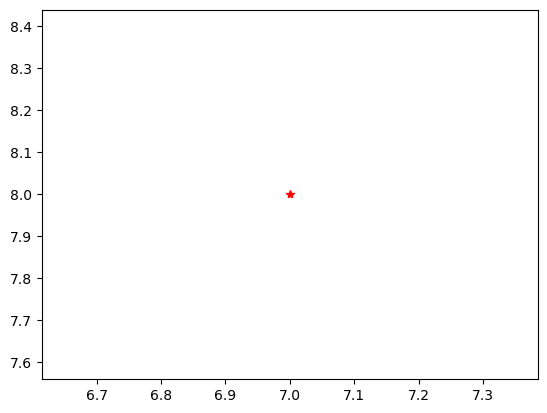

In [129]:
plt.plot(7, 8, color = 'red', marker = '*') #For line plot (points connected)
plt.show()

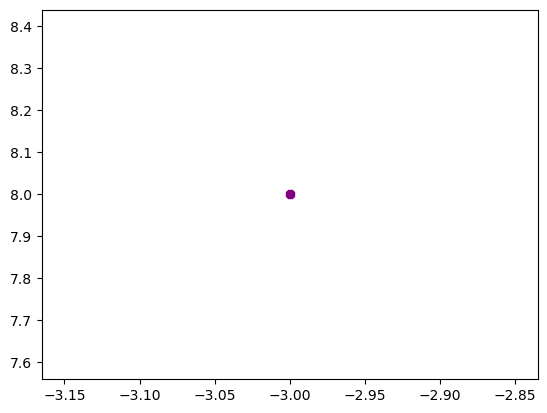

In [131]:
x = -3
y = 8
plt.plot(x, y, color = 'purple', marker = '8')
plt.show()

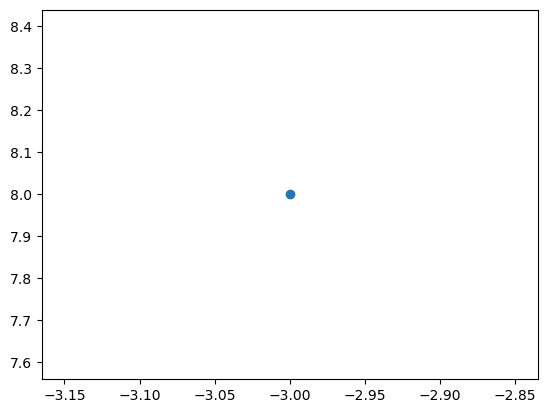

In [133]:
plt.scatter(x, y) #Scatter plot (points only)
plt.show()

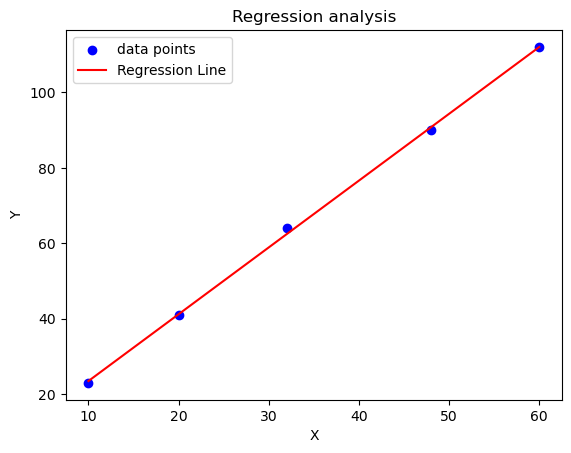

In [135]:
plt.scatter(X, Y, color='blue', label='data points')       #draw data points
plt.plot(X, y_hat, color='red', label='Regression Line')   #draw regression line
plt.xlabel('X')      #label x-axis
plt.ylabel('Y')     #label y-axis
plt.title("Regression analysis")   #set chart title
plt.legend()             #show labels for plotted items
plt.show()               #display the plot

In [236]:
#help(plt.plot)

## Using statsmodels library

In [243]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [245]:
import statsmodels.api as sm

In [247]:
X

0    10
1    20
2    32
3    48
4    60
Name: X, dtype: int64

In [253]:
X = sm.add_constant(X)
X

,const,X
0,1.0,10
1,1.0,20
2,1.0,32
3,1.0,48
4,1.0,60


In [255]:
result = sm.OLS(Y, X).fit()

In [268]:
result.summary()

C:\Users\Mahdi\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4699.
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           6.84e-06
Time:                        12:06:21   Log-Likelihood:                -6.0548
No. Observations:                   5   AIC:                             16.11
Df Residuals:                       3   BIC:                             15.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7985      0.996      5.824      0.010       2.630       8.967
X              1.7706      0.026     68.550      0.000       1.688       1.853
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.775
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.076
Skew:                           1.132   Prob(JB):                        0.584
Kurtosis:                       2.802   Cond. No.                         81.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### $\hat y = \beta_1 + \beta_2 X$

In [262]:
Y_HAT = result.predict(X)
Y_HAT

0     23.504854
1     41.211165
2     62.458738
3     90.788835
4    112.036408
dtype: float64

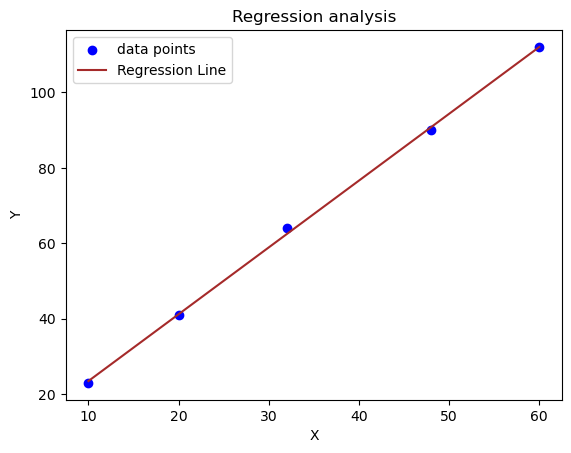

In [266]:
plt.scatter(data['X'], data['Y'], color = 'blue', label = 'data points')
plt.plot(data['X'], Y_HAT, color = 'brown', label = "Regression Line")
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Regression analysis")
plt.legend()
plt.show()

## Exercises

### Exercise 1
Use the data from the Excel file “Econometrics_II_Session_01_Exercises.xlsx” and replicate the same analysis in Python.

### Exercise 2

Using matplotlib, plot the data from Exercise 1. Make sure not to use the markers or colors used in this session — try something new and show me your creativity!

### Optional Fun Exercise

Using the data from Exercise 1, create a scatter plot where each point has a **random** color, size, and marker.

Goal: have fun, be creative, and play with matplotlib! ✨